## Import

In [34]:
import tensorflow as tf
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import cv2
import keras
import matplotlib

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
print("tf: ", tf.__version__)
print("keras: ", keras.__version__)
print("cv2: ", cv2.__version__)
print("np: ", np.__version__)
print("sklearn: ", sklearn.__version__)
print("matplotlib: ", matplotlib.__version__)

tf:  2.6.0
keras:  2.6.0
cv2:  4.5.1
np:  1.21.5
sklearn:  1.0.2
matplotlib:  3.5.1


## Data Downloading

In [37]:
# Data downloading
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

In [38]:
# Data shape
print(x_train.shape)
print(x_val.shape)
print(y_train[:10])
print(y_val[:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


In [39]:
# Show Image in OpenCV Window
cv2.imshow("Window", x_train[5141])
cv2.waitKey(0)
cv2.destroyAllWindows()

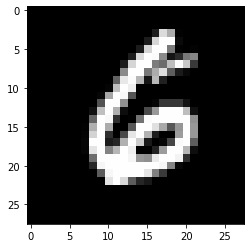

In [40]:
# Show Image in Notebook
plt.imshow(cv2.cvtColor(x_train[5141], cv2.COLOR_BGR2RGB))
plt.show()

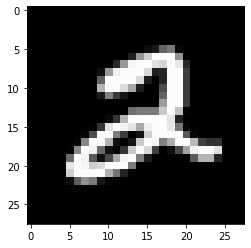

In [41]:
# Show Image in Notebook V2
x_train_image = np.tile(x_train[5, :, :].reshape((28, 28))[:, :, np.newaxis], (1, 1, 3))
plt.imshow(x_train_image, cmap="Greys")
plt.show()

In [42]:
# Labels Shape
print("y_train [shape %s] 10 examples:\n" % (str(y_train.shape)), y_train[:10])

y_train [shape (60000,)] 10 examples:
 [5 0 4 1 9 2 1 3 1 4]


## Data Reshape and Standardization

In [43]:
# Reshape Data

x_train_flat = x_train.reshape(-1, 28*28).astype(float)
print(x_train_flat.shape)

x_val_flat = x_val.reshape(-1, 28*28).astype(float)
print(x_val_flat.shape)

(60000, 784)
(10000, 784)


In [44]:
x_train_flat[0, ::20]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166., 170.,   0.,
         0., 247.,  80.,   0.,   0., 253.,   0.,   0., 108.,   0.,   0.,
         0.,   0.,   0.,   0., 183.,   0.,   0.,   0., 253.,   0.,   0.,
         0., 212.,   0.,   0.,   0.,   0.,   0.])

In [45]:
# Data Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_val_flat = scaler.transform(x_val_flat)

## Linear Model

In [46]:
%%time
# Training linear model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class="multinomial", solver="lbfgs")
clf.fit(x_train_flat, y_train)

CPU times: total: 2min 20s
Wall time: 11.8 s


LogisticRegression(multi_class='multinomial')

In [47]:
# Linear Model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_val, clf.predict(x_val_flat))

0.9246

## Gradient Boosting

In [48]:
%time
# Traning Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate=0.3, n_estimators=10, verbose=1, subsample=0.5)
clf.fit(x_train_flat, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3478           0.9369            1.94m
         2           1.0559           0.2971            1.72m
         3           0.8619           0.1909            1.51m
         4           0.7309           0.1255            1.29m
         5           0.6428           0.0867            1.08m
         6           0.5810           0.0606           51.68s
         7           0.5229           0.0552           38.79s
         8           0.4763           0.0413           25.90s
         9           0.4362           0.0338           12.94s
        10           0.4110           0.0223            0.00s


GradientBoostingClassifier(learning_rate=0.3, n_estimators=10, subsample=0.5,
                           verbose=1)

In [49]:
# Gradient Boosting Accuracy
accuracy_score(y_val, clf.predict(x_val_flat))

0.8897

## Multi Layer Perceptron

In [50]:
%time
# Traning Neural Network
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=10, random_state=0)
clf.fit(x_train_flat, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


MLPClassifier(max_iter=10, random_state=0)

In [51]:
# NN Accuracy
accuracy_score(y_val, clf.predict(x_val_flat))

0.9742